In [1]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

#Regressions:

from sklearn.multioutput import MultiOutputRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#Metric
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score


from pandas import DataFrame


# Show progress bar
from tqdm import tqdm


Bad key "text.kerning_factor" on line 4 in
/Users/harrisonsarsito/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv('augmented_data.csv')

In [3]:
input_col = ['Growth Temp (Celsius)', 'Metal_mmol (mmol)', 'Chalcogen_mmol (mmol)',
             'Amines_mmol (mmol)', 'CA_mmol (mmol)', 'Phosphines_mmol (mmol)', 
             'S_I_amount (g)', 'S_II_amount (g)', 'Time_min (min)', 
             'x0_cadmium acetate', 'x0_cadmium acetate dihydrate', 
             'x0_cadmium oxide', 'x0_cadmium stearate', 'x0_dimethylcadmium', 
             'x1_None', 'x1_benzoic acid', 'x1_dodecylphosphonic acid', 
             'x1_ethylphosphonic acid', 'x1_lauric acid', 
             'x1_myrstic acid', 'x1_oleic acid', 'x1_stearic acid',
             'x2_2-6-dimethylpyridine', 'x2_None', 'x2_aniline', 
             'x2_benzylamine', 'x2_dioctylamine/hexadecylamine',
             'x2_dodecylamine', 'x2_heptylamine', 'x2_hexadecylamine', 
             'x2_octadecylamine', 'x2_octylamine', 'x2_oleylamine', 
             'x2_pyridine', 'x2_trioctylamine', 'x3_None', 'x3_diphenylphosphine', 
             'x3_tributylphosphine', 'x3_trioctylphosphine', 
             'x3_triphenylphosphine', 'x4_None', 'x4_liquid parafin', 
             'x4_octadecene', 'x4_phenyl ether', 'x4_trioctylphosphine oxide', 
             'x5_None', 'x5_phosphinic acid', 'x5_trioctylphosphine oxide'
            ]

output_col = ['Diameter_nm','Absorbance max (nm)', 'PL max (nm)']

X = df[input_col]

y = df[output_col]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, shuffle=True)

In [4]:
y

,Diameter_nm,Absorbance max (nm),PL max (nm)
0,3.41,566.0,575.000000
1,2.50,474.0,617.000000
2,1.99,450.4,497.000000
3,2.13,471.6,510.000000
4,2.27,486.0,517.000000
...,...,...,...
229,1.70,450.0,537.714286
230,2.50,530.0,569.785714
231,3.50,585.0,589.714286
232,3.70,590.0,589.714286


# Preliminary evaluatiopn of some regressions

Note: The MSE or r2 of the multiouput regression outcomes are the average of all MSE or r2 outputs. 

In [8]:
#This is used to roughly show which regression performs better.
# Testing Regressions:

REGRESSIONS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10,
                                       max_features=32,     
                                       random_state=44),
    "K-nn": KNeighborsRegressor(),                          
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=0),
    "RandomForestRegressor": RandomForestRegressor(max_depth=4, random_state=2),
    "Decision Tree Regressor":DecisionTreeRegressor(max_depth=5),
    "MultiO/P GBR" :MultiOutputRegressor(GradientBoostingRegressor(n_estimators=5)),
    "MultiO/P AdaB" :MultiOutputRegressor(AdaBoostRegressor(n_estimators=5))
            }
# r2 is used to evaluate the performance of all regressions.

r2_list = list()

for name, reg in REGRESSIONS.items():     
    reg.fit(X_train, y_train)                 
    y_pred = pd.DataFrame(reg.predict(X_test))
    
    print(name, '\n')
    
# This loop will show r2 for each outcome
    for column in range(0, 3):
        r2 = r2_score(y_test.iloc[:, column], y_pred.iloc[:, column])
        r2_list.append(r2)
    
    print(' R^2 for diameter is ', r2_list[0], '\n',
          'R^2 for Absorbance is ', r2_list[1], '\n',
          'R^2 for PL is ', r2_list[2], '\n', '\n', 
         )
    del r2_list[:] #reset the list for the next regression

Extra trees 

 R^2 for diameter is  0.6501754679632583 
 R^2 for Absorbance is  0.9188488773799854 
 R^2 for PL is  0.7365077230540736 
 

K-nn 

 R^2 for diameter is  0.4339480735015191 
 R^2 for Absorbance is  0.5219067936995085 
 R^2 for PL is  0.35859346048108265 
 

Linear regression 

 R^2 for diameter is  0.1388060722618889 
 R^2 for Absorbance is  0.23583055000921005 
 R^2 for PL is  -0.311074656102702 
 

Ridge 

 R^2 for diameter is  0.30992255072483155 
 R^2 for Absorbance is  0.5217494772222535 
 R^2 for PL is  0.3261042590982015 
 

Lasso 

 R^2 for diameter is  -0.0012262257360822204 
 R^2 for Absorbance is  0.4673181908902926 
 R^2 for PL is  0.24697801344016934 
 

ElasticNet 

 R^2 for diameter is  0.0312198570884763 
 R^2 for Absorbance is  0.3959513547611436 
 R^2 for PL is  0.16136347077262236 
 

RandomForestRegressor 

 R^2 for diameter is  0.48606735479134167 
 R^2 for Absorbance is  0.7419310017085641 
 R^2 for PL is  0.549046693669781 
 

Decision Tree Regresso

From the R2 values above, Extra Trees, Random Forest, Ridge, Decision Tree, and MultiO/P AdaB give the best predictions.

Now, we are going to optimize each of the the above regressions by grid searching the parameters

# Extra Trees

In [13]:
max_r2 = 0

max_i, max_j, max_k  = 0, 0, 0

for i in tqdm(range(1, 20)):
    for j in range(1, 10):
        for k in range(0, 80, 1):
            
            ET_reg = ExtraTreesRegressor(n_estimators=i,
                                         max_features=j,     
                                         random_state=k).fit(X_train, y_train)
            
            
            ET_y_pred = ET_reg.predict(X_test)
            
            ET_r2 = r2_score(y_test, pd.DataFrame(ET_y_pred))
            
            if (max_r2 < ET_r2):
                max_r2 = ET_r2
                max_i = i
                max_j = j
                max_k = k
            
print(max_r2, max_i, max_j, max_k)

100%|██████████| 19/19 [03:41<00:00, 11.64s/it]

0.8368196141138685 2 8 44


From the results above the parameters are applied to the model

In [5]:
ET_reg = ExtraTreesRegressor(n_estimators=3,
                            max_features=8,     
                            random_state=44).fit(X_train, y_train)
            
            
ET_y_pred = ET_reg.predict(X_test)

outputs = ('diameter: ', 'Abs: ', 'PL: ')

for i in range(0, 3):
    ET_r2 = r2_score(y_test.iloc[:, i], pd.DataFrame(ET_y_pred).loc[:, i])
    ET_MSE = mean_squared_error(y_test.iloc[:, i], pd.DataFrame(ET_y_pred).loc[:, i])
    ET_MAE = mean_absolute_error(y_test.iloc[:, i], pd.DataFrame(ET_y_pred).loc[:, i])
    print(outputs[i], 'r2:', ET_r2, '; MSE:', ET_MSE, '; MAE:', ET_MAE )


diameter:  r2: 0.8089673742612287 ; MSE: 0.5024212046572104 ; MAE: 0.36824184397163123
Abs:  r2: 0.9348373140508064 ; MSE: 392.9810874704492 ; MAE: 13.782978723404254
PL:  r2: 0.7617203965605577 ; MSE: 509.8239373954309 ; MAE: 14.285207697872332


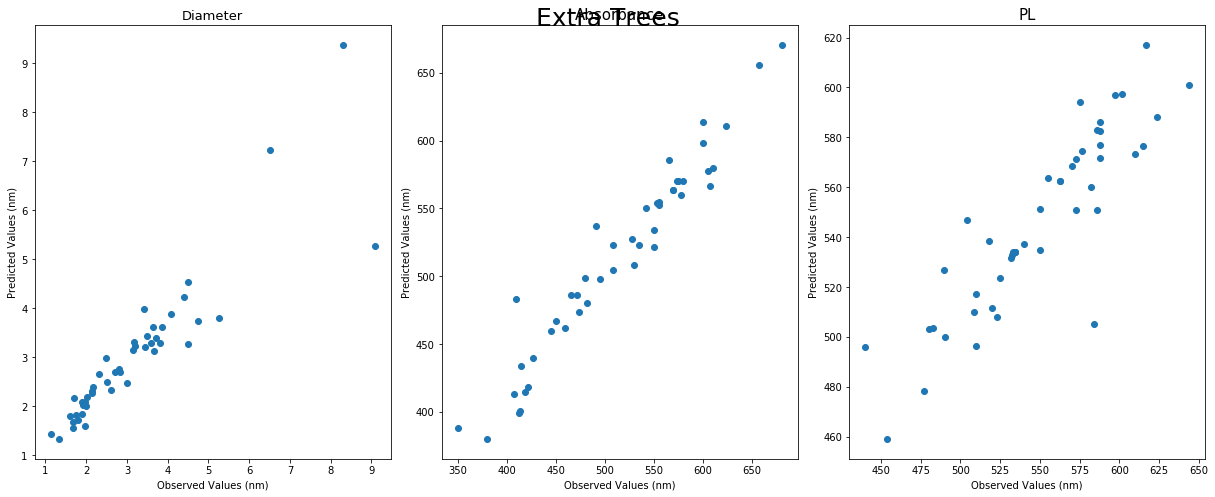

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,7))
fig.suptitle('Extra Trees', fontsize=25)

ax1.plot(y_test.iloc[:, 0], pd.DataFrame(ET_y_pred).loc[:, 0],'o')
ax1.set_title('Diameter',fontsize=13)
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(y_test.iloc[:, 1], pd.DataFrame(ET_y_pred).loc[:, 1],'o')
ax2.set_title('Absorbance', fontsize=15)
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(y_test.iloc[:, 2], pd.DataFrame(ET_y_pred).loc[:, 2],'o')
ax3.set_title('PL', fontsize=15)
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
fig.tight_layout()

# Random Forest

In [ ]:
max_r2 = 0

max_i, max_j, max_k, max_m  = 0, 0, 0, 0

for i in tqdm(range(5, 15)):
    for j in range(5, 20):
        for k in range(10, 20):
            for m in range (40, 60):
                RF_reg = RandomForestRegressor(max_depth=i, 
                                                n_estimators=j, 
                                                max_features=k,
                                                random_state=m).fit(X_train, y_train)

                RF_y_pred = RF_reg.predict(X_test)

                RF_r2 = r2_score(y_test, pd.DataFrame(RF_y_pred))

                if (max_r2 < RF_r2):
                    max_r2 = RF_r2
                    max_i = i
                    max_j = j
                    max_k = k
                    max_m = m
            
print(max_r2, max_i, max_j, max_k, max_m)

  0%|          | 0/10 [00:00<?, ?it/s]

From the results above (*take a long time to run*) the parameters are applied to the model

In [6]:
RF_reg = RandomForestRegressor(max_depth=13, 
                               n_estimators=5, 
                               max_features=14,
                               random_state=57).fit(X_train, y_train)
            
RF_y_pred = RF_reg.predict(X_test)

outputs = ('diameter: ', 'Abs : ', 'PL: ')
for i in range(0, 3):
    RF_r2 = r2_score(y_test.iloc[:, i], pd.DataFrame(RF_y_pred).loc[:, i])
    RF_MSE = mean_squared_error(y_test.iloc[:, i], pd.DataFrame(RF_y_pred).loc[:, i])
    RF_MAE = mean_absolute_error(y_test.iloc[:, i], pd.DataFrame(RF_y_pred).loc[:, i])
    print(outputs[i], 'r2:', RF_r2, '; MSE:', RF_MSE, '; MAE:', RF_MAE)

diameter:  r2: 0.7668918060973011 ; MSE: 0.6130811380680852 ; MAE: 0.4153970212765957
Abs :  r2: 0.8923295132174645 ; MSE: 649.3358026595747 ; MAE: 19.45329787234043
PL:  r2: 0.8237237798014639 ; MSE: 377.1612649743294 ; MAE: 13.518009118085107


In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,7))
fig.suptitle('Random Forest', fontsize=25)

ax1.plot(y_test.iloc[:, 0], pd.DataFrame(RF_y_pred).loc[:, 0],'o')
ax1.set_title('Diameter',fontsize=13)
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(y_test.iloc[:, 1], pd.DataFrame(RF_y_pred).loc[:, 1],'o')
ax2.set_title('Absorbance', fontsize=15)
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(y_test.iloc[:, 2], pd.DataFrame(RF_y_pred).loc[:, 2],'o')
ax3.set_title('PL', fontsize=15)
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
fig.tight_layout()

# Lasso

In [ ]:
min_r2 = 0

min_i, min_j, min_k, min_m  = 0, 0, 0, 0

for i in tqdm(np.arange(0.1, 2.0, 0.02)):
    for j in range(1, 100):
        L_reg = Lasso(alpha=i, random_state=j).fit(X_train, y_train)
        L_y_pred = L_reg.predict(X_test)
        L_r2 = r2_score(y_test, pd.DataFrame(L_y_pred))
      
        if (min_r2 < L_r2):
                min_r2 = L_r2
                min_i = i
                min_j = j

            
print(min_r2, min_i, min_j)

From the results above the parameters are applied to the model

In [7]:
L_reg = Lasso(alpha=0.1, random_state=1).fit(X_train, y_train)
            
L_y_pred = L_reg.predict(X_test)

outputs = ('diameter:', 'Abs:', 'PL:')
for i in range(0, 3):
    L_r2 = r2_score(y_test.iloc[:, i], pd.DataFrame(L_y_pred).loc[:, i])
    L_MSE = mean_squared_error(y_test.iloc[:, i], pd.DataFrame(L_y_pred).loc[:, i])
    L_MAE = mean_absolute_error(y_test.iloc[:, i], pd.DataFrame(L_y_pred).loc[:, i])
    print(outputs[i], 'r2:', L_r2, '; MSE:', L_MSE, '; MAE:', L_MAE )

diameter: r2: 0.2521760419982202 ; MSE: 1.9667981445460594 ; MAE: 0.9221045406193107
Abs: r2: 0.5747460874430703 ; MSE: 2564.6079895783287 ; MAE: 39.04210834297732
PL: r2: 0.44764499740798624 ; MSE: 1181.8208449095907 ; MAE: 26.396211097944455


In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,7))
fig.suptitle('Lasso', fontsize=25)

ax1.plot(y_test.iloc[:, 0], pd.DataFrame(L_y_pred).loc[:, 0],'o')
ax1.set_title('Diameter',fontsize=13)
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(y_test.iloc[:, 1], pd.DataFrame(L_y_pred).loc[:, 1],'o')
ax2.set_title('Absorbance', fontsize=15)
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(y_test.iloc[:, 2], pd.DataFrame(L_y_pred).loc[:, 2],'o')
ax3.set_title('PL', fontsize=15)
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
fig.tight_layout()

# Decision Trees

In [ ]:
max_r2 = 0

max_i, max_j, max_k, max_m  = 0, 0, 0, 0

for i in tqdm(range(5, 15)):
    for j in range(5, 15):
        for k in range(40, 60):
            for m in range (10, 50, 2):
                DT_reg = DecisionTreeRegressor(max_depth=i, 
                                               max_features=j,
                                               random_state=k, 
                                               max_leaf_nodes=m).fit(X_train, y_train)

                DT_y_pred = DT_reg.predict(X_test)

                DT_r2 = r2_score(y_test, pd.DataFrame(DT_y_pred))

                if (max_r2 < DT_r2):
                    max_r2 = DT_r2
                    max_i = i
                    max_j = j
                    max_k = k
                    max_m = m
            
print(max_r2, max_i, max_j, max_k, max_m)

From the results above the parameters are applied to the model

In [8]:
DT_reg = DecisionTreeRegressor(max_depth=12, max_features=11, 
                      random_state=55, max_leaf_nodes=48).fit(X_train, y_train)

DT_y_pred = DT_reg.predict(X_test)

outputs = ('diameter:', 'Abs:', 'PL:')
for i in range(0, 3):
    DT_r2 = r2_score(y_test.iloc[:, i], pd.DataFrame(DT_y_pred).loc[:, i])
    DT_MSE = mean_squared_error(y_test.iloc[:, i], pd.DataFrame(DT_y_pred).loc[:, i])
    DT_MAE = mean_absolute_error(y_test.iloc[:, i], pd.DataFrame(DT_y_pred).loc[:, i])
    print(outputs[i], 'r2:', DT_r2, '; MSE:', DT_MSE, '; MAE:', DT_MAE  )

diameter: r2: 0.6817126348319635 ; MSE: 0.8371047658297387 ; MAE: 0.5296710638297872
Abs: r2: 0.8705969089841237 ; MSE: 780.400112252983 ; MAE: 22.740042983021702
PL: r2: 0.7282100418689819 ; MSE: 581.5228185660071 ; MAE: 15.875343093997431


In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,7))
fig.suptitle('Decision Trees', fontsize=25)

ax1.plot(y_test.iloc[:, 0], pd.DataFrame(DT_y_pred).loc[:, 0],'o')
ax1.set_title('Diameter',fontsize=13)
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(y_test.iloc[:, 1], pd.DataFrame(DT_y_pred).loc[:, 1],'o')
ax2.set_title('Absorbance', fontsize=15)
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(y_test.iloc[:, 2], pd.DataFrame(DT_y_pred).loc[:, 2],'o')
ax3.set_title('PL', fontsize=15)
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
fig.tight_layout()

# AdaBoost Regressor

In [ ]:
max_r2 = 0

max_i, max_j, max_k, max_m  = 0, 0, 0, 0

for i in tqdm(range(5, 15)):
    for j in np.arange(0.1, 2.0, 0.02):
        for k in ('linear', 'square', 'exponential'):
            for m in range(40, 60):
                AB_reg = MultiOutputRegressor(AdaBoostRegressor(n_estimators=i, 
                                                                learning_rate=j, 
                                                                loss=k, 
                                                                random_state=m)).fit(X_train, y_train)

                AB_y_pred = AB_reg.predict(X_test)

                AB_r2 = r2_score(y_test, pd.DataFrame(AB_y_pred))

                if (max_r2 < AB_r2):
                    max_r2 = AB_r2
                    max_i = i
                    max_j = j
                    max_k = k
                    max_m = m
            
print(max_r2, max_i, max_j, max_k, max_m)

From the results above (take a really long time to run) the parameters are applied to the model

In [9]:
AB_reg = MultiOutputRegressor(AdaBoostRegressor(n_estimators=12 ,
                                                learning_rate=0.34, 
                                                loss='exponential', 
                                                random_state=47)).fit(X_train, y_train)

AB_y_pred = AB_reg.predict(X_test)

outputs = ('diameter:', 'Abs:', 'PL:')
for i in range(0, 3):
    AB_r2 = r2_score(y_test.iloc[:, i], pd.DataFrame(AB_y_pred).loc[:, i])
    AB_MSE = mean_squared_error(y_test.iloc[:, i], pd.DataFrame(AB_y_pred).loc[:, i])
    AB_MAE = mean_absolute_error(y_test.iloc[:, i], pd.DataFrame(AB_y_pred).loc[:, i])
    print(outputs[i], 'r2:', AB_r2, '; MSE:', AB_MSE, '; MAE:', AB_MAE )

diameter: r2: 0.6610728796966749 ; MSE: 0.8913879051563259 ; MAE: 0.5686066124185174
Abs: r2: 0.7643858313580297 ; MSE: 1420.9345558370596 ; MAE: 28.862600897357588
PL: r2: 0.6881234053222303 ; MSE: 667.2923371744201 ; MAE: 19.338244856225213


In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,7))
fig.suptitle('AdaBoost', fontsize=25)

ax1.plot(y_test.iloc[:, 0], pd.DataFrame(AB_y_pred).loc[:, 0],'o')
ax1.set_title('Diameter',fontsize=13)
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(y_test.iloc[:, 1], pd.DataFrame(AB_y_pred).loc[:, 1],'o')
ax2.set_title('Absorbance', fontsize=15)
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(y_test.iloc[:, 2], pd.DataFrame(AB_y_pred).loc[:, 2],'o')
ax3.set_title('PL', fontsize=15)
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
fig.tight_layout()

# Ridge

In [ ]:
max_r2 = 0

max_i, max_j  = 0, 0

for i in tqdm(np.arange(0.04, 1.4, 0.02)):
    for j in range(30, 60):
        R_reg =  Ridge(alpha=i,
                       random_state=j).fit(X_train, y_train)
            
            
        R_y_pred = R_reg.predict(X_test)
            
        R_r2 = r2_score(y_test, pd.DataFrame(R_y_pred))
            
        if (max_r2 < R_r2):
                max_r2 = R_r2
                max_i = i
                max_j = j
            
print(max_r2, max_i, max_j)

From the results above the parameters are applied to the model

In [10]:
R_reg = Ridge(alpha=0.06, 
              random_state=30).fit(X_train, y_train)

R_y_pred = R_reg.predict(X_test)

outputs = ('diameter:', 'Abs:', 'PL:')
for i in range(0, 3):
    R_r2 = r2_score(y_test.iloc[:, i], pd.DataFrame(R_y_pred).loc[:, i])
    R_MSE = mean_squared_error(y_test.iloc[:, i], pd.DataFrame(R_y_pred).loc[:, i])
    R_MAE = mean_absolute_error(y_test.iloc[:, i], pd.DataFrame(R_y_pred).loc[:, i])
    print(outputs[i], 'r2:', R_r2, '; MSE:', R_MSE, '; MAE:', R_MAE )

diameter: r2: 0.36218572339016175 ; MSE: 1.677469573391538 ; MAE: 0.8576795567061584
Abs: r2: 0.6618415887061495 ; MSE: 2039.3551657945618 ; MAE: 34.786545878492625
PL: r2: 0.49232904216942 ; MSE: 1086.21469436126 ; MAE: 24.827265504342815


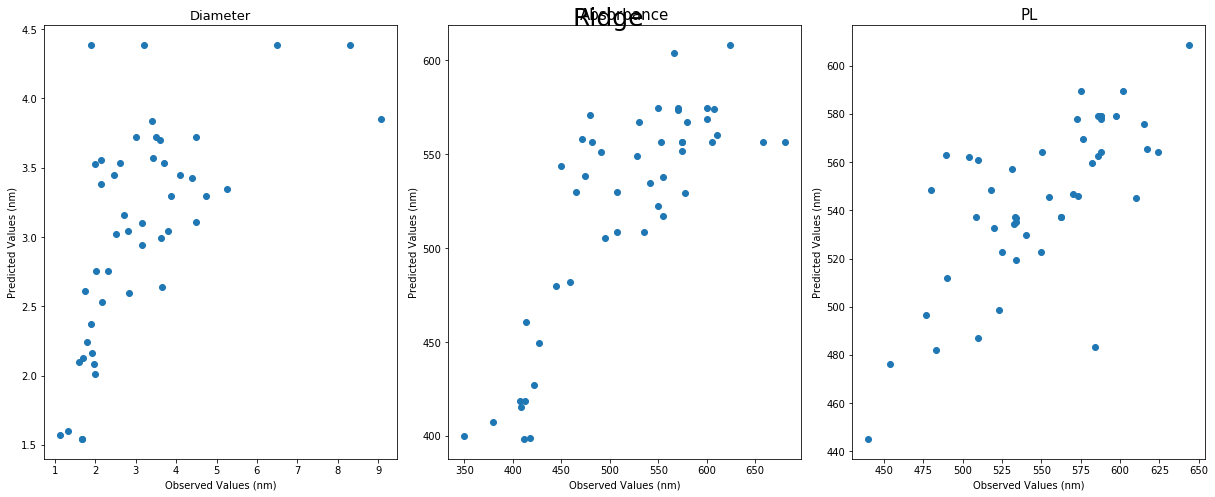

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,7))
fig.suptitle('Ridge', fontsize=25)

ax1.plot(y_test.iloc[:, 0], pd.DataFrame(R_y_pred).loc[:, 0],'o')
ax1.set_title('Diameter',fontsize=13)
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(y_test.iloc[:, 1], pd.DataFrame(R_y_pred).loc[:, 1],'o')
ax2.set_title('Absorbance', fontsize=15)
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(y_test.iloc[:, 2], pd.DataFrame(R_y_pred).loc[:, 2],'o')
ax3.set_title('PL', fontsize=15)
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
fig.tight_layout()

# Ridge Cross Validation 

In [12]:
max_r2 = 0

max_i = 0

for i in tqdm(np.arange(0.01, 10, 0.01)):

        RCV_reg =  RidgeCV(alphas=i).fit(X_train, y_train)


        RCV_y_pred = RCV_reg.predict(X_test)

        RCV_r2 = r2_score(y_test, pd.DataFrame(RCV_y_pred))

        if (max_r2 < RCV_r2):
                max_r2 = RCV_r2
                max_i = i
                max_j = j

print(max_r2, max_i)

100%|██████████| 999/999 [00:08<00:00, 122.55it/s]

0.5058675808961978 0.06999999999999999


From the results above the parameters are applied to the model

In [10]:
RCV_reg = RidgeCV(alphas=0.07).fit(X_train, y_train)

RCV_y_pred = RCV_reg.predict(X_test)

outputs = ('diameter:', 'Abs:', 'PL:')
for i in range(0, 3):
    RCV_r2 = r2_score(y_test.iloc[:, i], pd.DataFrame(RCV_y_pred).loc[:, i])
    RCV_MSE = mean_squared_error(y_test.iloc[:, i], pd.DataFrame(RCV_y_pred).loc[:, i])
    RCV_MAE = mean_absolute_error(y_test.iloc[:, i], pd.DataFrame(RCV_y_pred).loc[:, i])
    print(outputs[i], 'r2:', RCV_r2, '; MSE:', RCV_MSE, '; MAE:', RCV_MAE )

diameter: r2: 0.36135982901509445 ; MSE: 1.6796416989393925 ; MAE: 0.8602097237470137
Abs: r2: 0.6627630834736922 ; MSE: 2033.7978439842 ; MAE: 34.986720558926685
PL: r2: 0.49347983019980113 ; MSE: 1083.7524639550995 ; MAE: 24.987863052911653


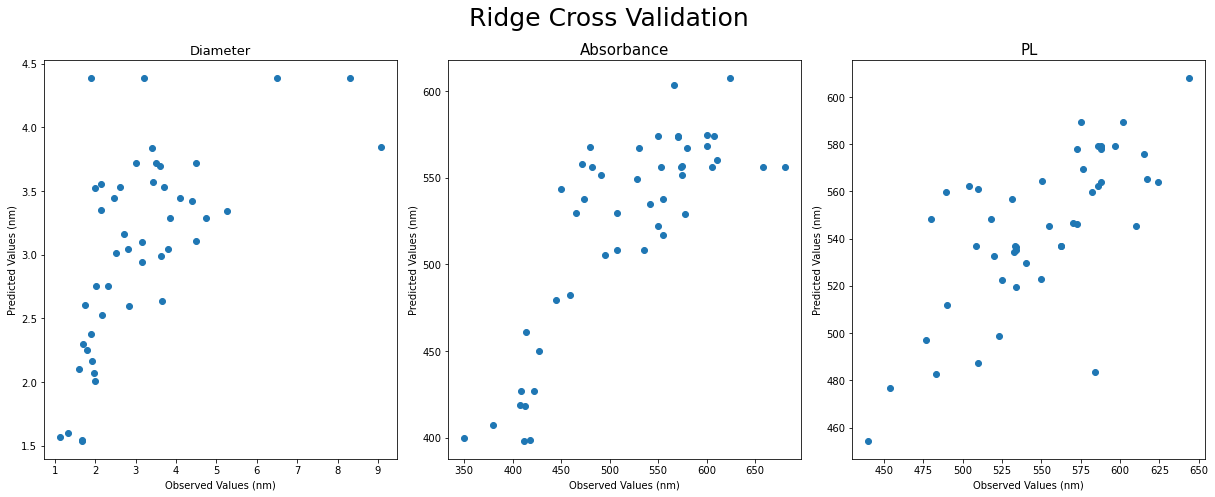

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,7))
fig.suptitle('Ridge Cross Validation', fontsize=25)

ax1.plot(y_test.iloc[:, 0], pd.DataFrame(RCV_y_pred).loc[:, 0],'o')
ax1.set_title('Diameter',fontsize=13)
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(y_test.iloc[:, 1], pd.DataFrame(RCV_y_pred).loc[:, 1],'o')
ax2.set_title('Absorbance', fontsize=15)
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(y_test.iloc[:, 2], pd.DataFrame(RCV_y_pred).loc[:, 2],'o')
ax3.set_title('PL', fontsize=15)
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
fig.tight_layout()

# K Neighbors

In [41]:
max_r2 = 0

max_i = 0

max_j = 0

for i in tqdm(range(1, 30)):
    for j in range(1, 20):

        KNN_reg = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train, y_train)

        KNN_y_pred = KNN_reg.predict(X_test)

        KNN_r2 = r2_score(y_test, pd.DataFrame(KNN_y_pred))

        if (max_r2 < KNN_r2):
                max_r2 = KNN_r2
                max_i = i
                max_j = j

print(max_r2, max_i, max_j)

100%|██████████| 29/29 [00:09<00:00,  3.08it/s]

0.7228947186587202 2 4


From the results above the parameters are applied to the model

In [15]:
KNN_reg = KNeighborsRegressor(n_neighbors=2, 
                              p=4).fit(X_train, y_train)

KNN_y_pred = KNN_reg.predict(X_test)

outputs = ('diameter:', 'Abs:', 'PL:')
for i in range(0, 3):
    KNN_r2 = r2_score(y_test.iloc[:, i], pd.DataFrame(KNN_y_pred).loc[:, i])
    KNN_MSE = mean_squared_error(y_test.iloc[:, i], pd.DataFrame(KNN_y_pred).loc[:, i])
    KNN_MAE = mean_absolute_error(y_test.iloc[:, i], pd.DataFrame(KNN_y_pred).loc[:, i])
    print(outputs[i], 'r2:', KNN_r2, '; MSE:', KNN_MSE,'; MAE:', KNN_MAE)

diameter: r2: 0.7489402500096387 ; MSE: 0.660294237925532 ; MAE: 0.4910904255319149
Abs: r2: 0.8015202037625659 ; MSE: 1196.9857446808512 ; MAE: 26.31276595744681
PL: r2: 0.6182237022039563 ; MSE: 816.8500053597586 ; MAE: 19.286474160638292


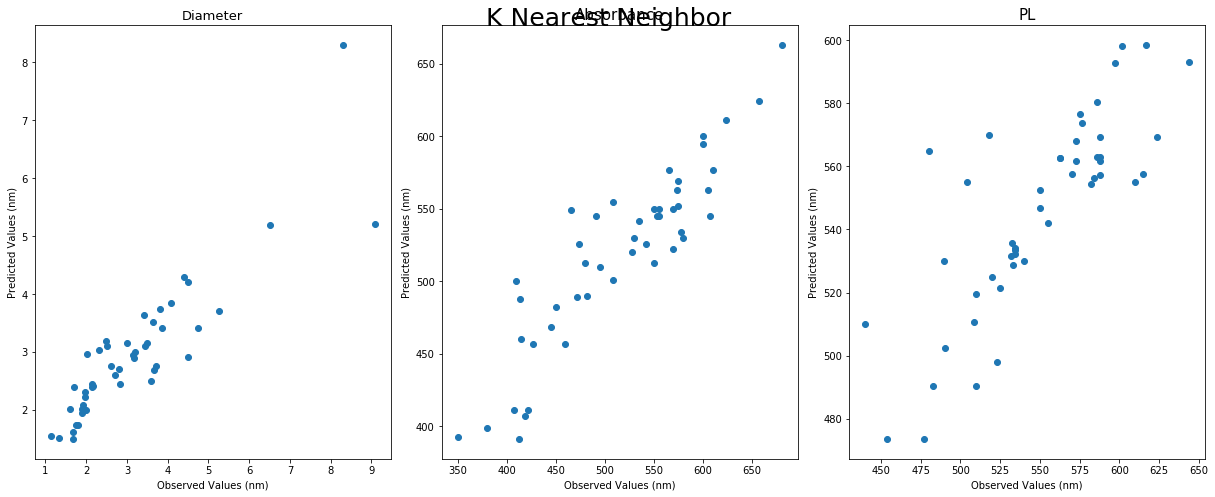

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,7))
fig.suptitle('K Nearest Neighbor', fontsize=25)

ax1.plot(y_test.iloc[:, 0], pd.DataFrame(KNN_y_pred).loc[:, 0],'o')
ax1.set_title('Diameter',fontsize=13)
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(y_test.iloc[:, 1], pd.DataFrame(KNN_y_pred).loc[:, 1],'o')
ax2.set_title('Absorbance', fontsize=15)
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(y_test.iloc[:, 2], pd.DataFrame(KNN_y_pred).loc[:, 2],'o')
ax3.set_title('PL', fontsize=15)
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
fig.tight_layout()